# Estadística Descriptiva & Pruebas de hipótesis

Es fácil calcular estadísticos de resumen en `python`. Aquí tienen cómo calcular la media, desviación estándar, varianza y mediana.

## Medidas de resumen

Creamos 100 números aleatorios con distribución normal:

In [1]:
import numpy as np
N = 100
x = np.random.normal(loc = 0, scale = 1, size = N)

### Desviación estándar

In [2]:
np.std(x)

0.861980300201346

### Varianza

In [3]:
np.var(x)

0.7430100379352025

`hstack` agrega valores al vector:

In [4]:
x1 = np.hstack((x,np.nan))

### Promedio

Toma en cuenta lo que pasa con valores `nan`

In [5]:
np.mean(x1)

nan

In [6]:
np.nanmean(x1)

0.19251217933219608

In [7]:
np.nanstd(x1)

0.861980300201346

In [8]:
np.nanvar(x1)

0.7430100379352025

In [9]:
np.median(x)

0.20508312174465215

### La moda

In [10]:
from scipy import stats

In [11]:
data = [1,3,4,4,7,4]

In [12]:
stats.mode(data)

/var/folders/0p/n_r_hl095sv7nktfp_8n9n_80000gn/T/ipykernel_2869/3267261142.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(data)


ModeResult(mode=array([4]), count=array([3]))

### Rango

In [13]:
range = np.ptp(x) # ptp: peak to peak

In [14]:
range

4.742265582406896

### Percentiles

In [15]:
from scipy import stats

#https://docs.scipy.org/doc/scipy/reference/stats.html
stats.mstats.mquantiles(x)

array([-0.38034133,  0.20508312,  0.72916779])

In [16]:
stats.mstats.mquantiles(x,prob=np.arange(0,1.1,0.1))

array([-1.72802048, -0.82852616, -0.59685361, -0.28259312,  0.03927731,
        0.20508312,  0.35782023,  0.58995414,  0.79563471,  1.18165891,
        3.0142451 ])

In [17]:
stats.describe(x)

DescribeResult(nobs=100, minmax=(-1.728020480553834, 3.014245101853062), mean=0.19251217933219608, variance=0.7505151898335379, skewness=0.48881342823666857, kurtosis=1.0302836935151003)

## Distribuciones

In [18]:
miFD = stats.norm(5,3)

In [19]:
miFD

In [20]:
x = np.linspace(-5,15,101)
y1 = miFD.pdf(x) # densidad
y2 = miFD.cdf(x) # acumulada
y3 = miFD.ppf(y2) # cuantil

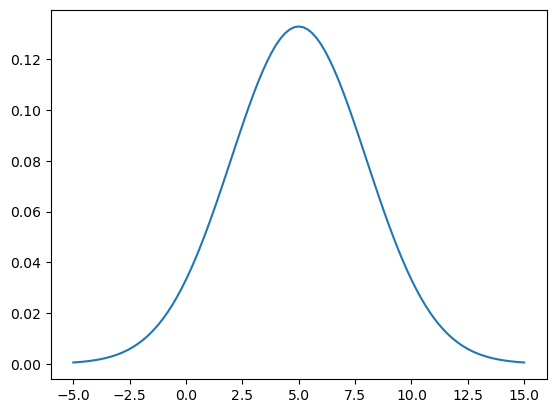

In [21]:
#%matplotlib notebook
import matplotlib.pyplot as plt

plt.figure()
plt.plot(x,y1,'-');

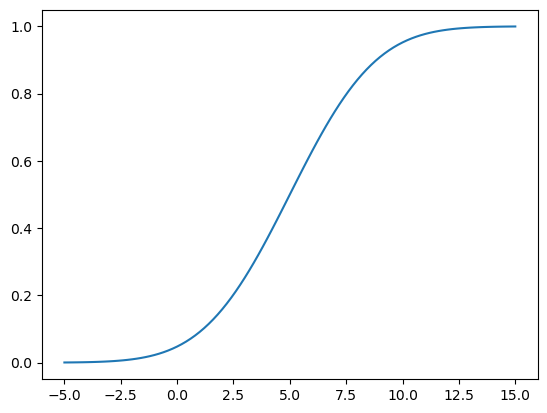

In [22]:
plt.figure()
plt.plot(x,y2,'-');

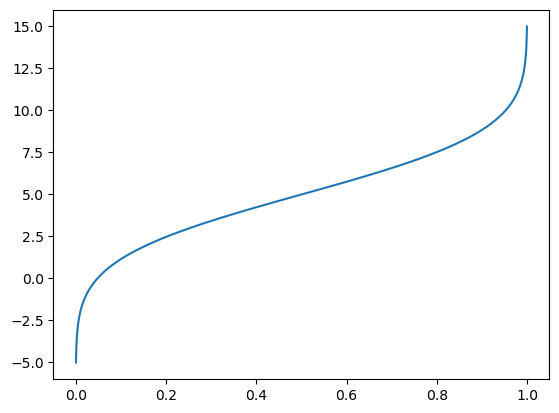

In [23]:
plt.figure()
x1 = np.linspace(0,1, len(y3))
plt.plot(y2,y3,'-');

Distribución acumulada empírica

In [24]:
x = stats.norm.rvs(loc=0,scale=1,size=1000) # distribucion normal estandar
x = np.sort(x) # odenamos los valores de la variable
n = x.size # tamano de la muestra
y = np.arange(1, n+1) / n # % acumulado

Text(0, 0.5, 'y')

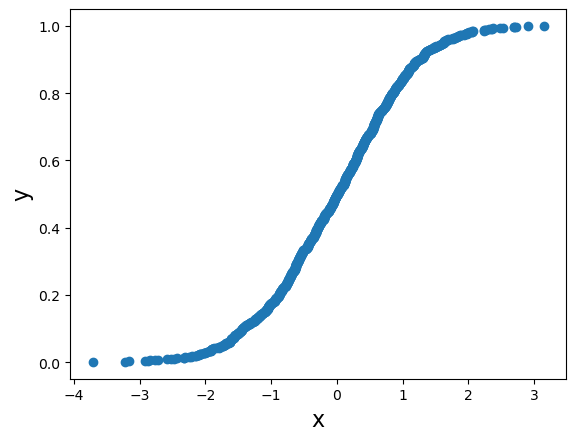

In [25]:
plt.figure()
plt.scatter(x=x, y=y);
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

In [26]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(x)

In [27]:
ecdf(1.5)

0.936

QQ plot

In [28]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html#scipy.stats.probplot
nsample = 100
np.random.seed(7654321)

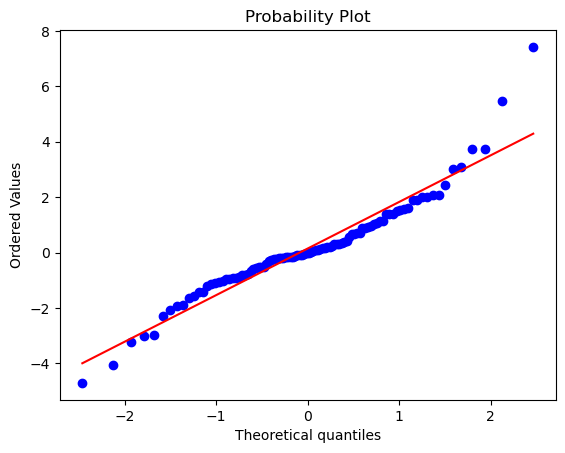

In [29]:
plt.figure()
x = stats.t.rvs(df=3, size=nsample)
res = stats.probplot(x, plot=plt)

## Test sobre una y dos muestras

Se introducen dos funciones: `stats.ttest_1samp` y `stats.wilcoxon` para el test t y el test de Wilcoxon respectivamente. Ambos pueden ser usados para una muestra o dos muestras así como para datos pareados. Note que el test de Wilcoxon para dos muestras es lo mismo que el test de Mann–Whitney.

### El test t

Este test se basa en el supuesto de normalidad de los datos. Es decir que los datos $x_1\ldots,x_n$ se asumen como realizaciones independientes de variables aleatorias con media $\mu$ y varianza $\sigma^2$, $N(\mu, \sigma^2)$. Se tiene que la hipótesis nula es que $\mu=\mu_0$.

Se puede estimar los parámetros $\mu$ y $\sigma$ por la media $\bar{x}$ y la desviación estándar  $\sigma$, aunque recuerde que solo son estimaciones del valor real.

Veamos un ejemplo del consuo diario de calorías de 11 mujeres:

In [30]:
daily_intake = [5260,5470,5640,6180,6390,6515,
                  6805,7515,7515,8230,8770]

Veamos algunas estadísticas de resumen:

In [31]:
stats.describe(daily_intake)

DescribeResult(nobs=11, minmax=(5260, 8770), mean=6753.636363636364, variance=1304445.4545454548, skewness=0.3674679616524392, kurtosis=-0.9757942883536157)

Se podría querer saber si el consumo de energía de las mujeres se desvía de una valor recomendado de $7725$. Asumiendo que los datos vienen de una distribución normal, el objetivo es hacer una prueba para saber si la media de la distribución es $\mu = 7725$.

In [32]:
stats.ttest_1samp(daily_intake,7725)

TtestResult(statistic=-2.8207540608310193, pvalue=0.018137235176105812, df=10)

In [33]:
t, pval = stats.ttest_1samp(daily_intake,7725)

In [34]:
t

-2.8207540608310193

In [35]:
pval

0.018137235176105812

### Wilcoxon

In [36]:
(rank, pVal) = stats.wilcoxon(x=(np.array(daily_intake)-7725))

In [37]:
(rank, pVal)

(8.0, 0.0244140625)

Para efectos prácticos, cuando se trata de una muestra, el test t y el de Wilcoxon suelen arrojar resultados muy similares.

## Test t para dos muestras

Se usa esta prueba con la hipótesis nula de que dos muestras provengan de distribuciones normales con la misma media.

Se puede tener dos enfoques, que las muestras tengan la misma varianza (enfoque clásico) o difieran en varianza.

In [38]:
import numpy as np
from scipy import stats
import os as os
import pandas as pd
#os.chdir('C:/Users/VICTOR/Documents/AnalyticsPython/Data')

energy = pd.read_csv('Data/energy.csv')
energy.head()


FileNotFoundError: [Errno 2] No such file or directory: 'Data/energy.csv'

In [39]:
g1 = energy[energy.stature=='obese'].expend.values
g2 = energy[energy.stature=='lean'].expend.values
stats.ttest_ind(g2,g1,equal_var=False)

Ttest_indResult(statistic=-3.855503558973697, pvalue=0.0014106918447179043)

In [40]:
stats.ttest_ind(g2,g1,equal_var=True)

Ttest_indResult(statistic=-3.9455649161549835, pvalue=0.0007989982111700593)

### Comparación de varianzas

Aún cuando en `python` se puede hacer la prueba sobre dos muestras sin el supuesto de igualdad en las varianzas, podrías estar interesado en hacer una prueba exclusiva de este supuesto.

In [41]:
import statistics 
F = statistics.variance(g2)/statistics.variance(g1)
df1 = len(g1) - 1
df2 = len(g2) - 1
alpha = 0.05 
p_value = stats.f.cdf(F, df2, df1)
(F,p_value*2)

(0.7844459792357035, 0.6797459853760682)

### Test de Wilcoxon para dos muestras

In [42]:
u_statistic, pVal = stats.mannwhitneyu(g1, g2)

In [43]:
(u_statistic, pVal*2)

(105.0, 0.004243226771760098)

## Correlación


Se aborda a continuación medidas de correlación paramétricas y no paramétricas. El coeficiente de correlación es una medida de asociación que varía entre -1 y 1.

### Correlación de Pearson

El coeficiente de correlación empírico es:

$$ r = \frac{\sum (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum (x_i-\bar{x})^2\sum (y_i-\bar{y})^2}} $$

La función cor en `python` calcula la correlación entre dos o más vectores.

In [44]:
#import os as os
#os.chdir('C:/Users/VICTOR/Documents/AnalyticsPython/Data')
import pandas as pd
datos = pd.read_csv('Data/company_sales_data.csv')

In [45]:
datos

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


<IPython.core.display.Javascript object>


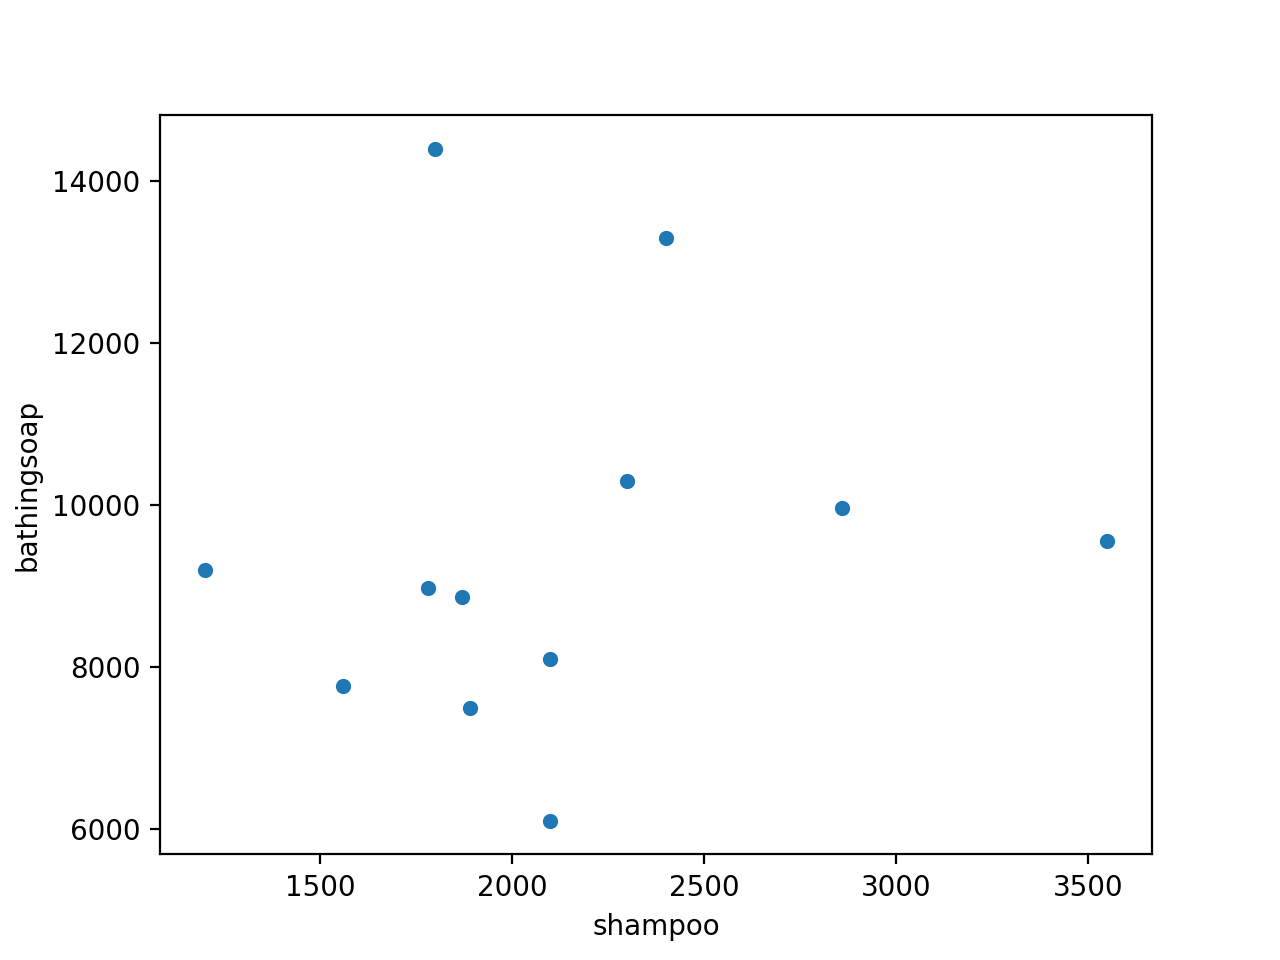

<AxesSubplot:xlabel='shampoo', ylabel='bathingsoap'>

In [46]:
datos.plot('shampoo','bathingsoap',kind = 'scatter')

In [47]:
np.corrcoef(datos.shampoo,datos.bathingsoap)

array([[1.        , 0.13756757],
       [0.13756757, 1.        ]])

In [48]:
stats.pearsonr(datos.shampoo,datos.bathingsoap) # devuelve la correlacion y el p-valor

(0.1375675688230804, 0.669853167345746)

In [49]:
stats.spearmanr(datos.shampoo,datos.bathingsoap)   # Spearman's rho

SpearmanrResult(correlation=0.2907184843604137, pvalue=0.35929281767147814)

In [50]:
stats.kendalltau(datos.shampoo,datos.bathingsoap)  # Kendall's tau

KendalltauResult(correlation=0.10687334289668038, pvalue=0.6304167324095719)

Interpretación de la correlación:

-  La correlación esta siempre entre -1 y 1. Lo primero que se interpreta es el signo
-  Directamente proporcional si es positivo, si es negativo pasa lo contrario
-  En segundo lugar se interpreta es la fuerza de la relación. Si esta más cerca de 1, significa que si aumenta una variable, la otra también.
-  Números intermedios, reducen la fuerza de la relación.